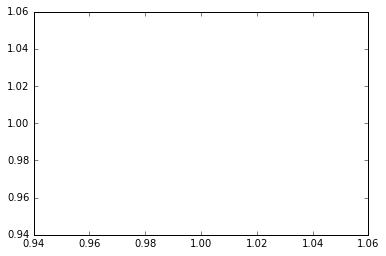

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(1,1)

In [2]:
import branch_kern as bk # GPflow kernels
import branch_kernParam as bkParam
import GPflow
import BranchingTree as bt
import tensorflow as tf
import numpy as np

N = 3 # how many points per function    
tree = bt.BinaryBranchingTree(0,10,fDebug=False) # set to true to print debug messages
tree.add(None,1,5) # single branching point
tree.add(1,2,7) # single branching point
(fm, fmb) = tree.GetFunctionBranchTensor()
#print fmb

tree.printTree()  
print fm
#print fmb
t = np.linspace(0.01,10,100)
(XForKernel, indicesBranch,Xtrue) = tree.GetFunctionIndexList(t,fReturnXtrue=True)
# GP flow kernel
D = 2
Xs = tf.placeholder("float64", shape=[None, D])
Ys = tf.placeholder("float64", shape=[None, D])

parameterVector = tf.placeholder("float64") # Needed by GPflow
kernInsideBranch = GPflow.kernels.RBF(D-1) # 1 dimension for labels

---------------------------2(7)[4,5]
------------------1(5)[2,3]
[[[ nan  nan]
  [  1.   2.]
  [  1.  nan]
  [  1.   2.]
  [  1.   2.]]

 [[  1.   2.]
  [ nan  nan]
  [  1.  nan]
  [  1.   2.]
  [  1.   2.]]

 [[  1.  nan]
  [  1.  nan]
  [ nan  nan]
  [  1.  nan]
  [  1.  nan]]

 [[  1.   2.]
  [  1.   2.]
  [  1.  nan]
  [ nan  nan]
  [  1.   2.]]

 [[  1.   2.]
  [  1.   2.]
  [  1.  nan]
  [  1.   2.]
  [ nan  nan]]]


In [15]:
import branch_kernParamGPflow 
BvaluesInit = np.ones((2,1))

KbranchParamGPflow = branch_kernParamGPflow.BranchKernelParam( kernInsideBranch, fm, BvInitial=BvaluesInit)
Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()),1)
print 'Initialised Kernel'
print KbranchParamGPflow
KbranchParamGPflow.Bv = Bvalues
print 'After update'
print KbranchParamGPflow
print 'free state'
KbranchParamGPflow.get_free_state()

Initialised Kernel
unnamed.Bv transform:(none) prior:None
[[ 1.]
 [ 1.]]
unnamed.kern.variance transform:+ve prior:None
[ 1.]
unnamed.kern.lengthscales transform:+ve prior:None
[ 2.]
After update
unnamed.Bv transform:(none) prior:None
[[ 5.]
 [ 7.]]
unnamed.kern.variance transform:+ve prior:None
[ 1.]
unnamed.kern.lengthscales transform:+ve prior:None
[ 2.]
free state


array([ 5.        ,  7.        ,  0.54132485,  1.85458654])

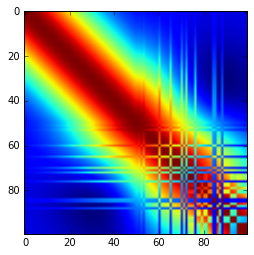

In [23]:
KbranchParamGPflow.kern.lengthscales = 2
KbranchParamGPflow.kern.variance = 1
with KbranchParamGPflow.tf_mode():
    KbranchParamGPflow.make_tf_array(parameterVector)
    KbranchParam_s = KbranchParamGPflow.K(Xs,Ys)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())  # Not sure this is needed
    KbranchParamGPflow_values = sess.run(KbranchParam_s, feed_dict={parameterVector:KbranchParamGPflow.get_free_state(), \
                                                              Xs:Xtrue, Ys:Xtrue.copy() })
plt.imshow(KbranchParamGPflow_values)

In [ ]:
# also do sample of paths?
(samples,L,K)=branch_kernParamGPflow.SampleBranchGP(KbranchParamGPflow,Xtrue,fmb.shape[0],0)
branch_kernParamGPflow.PlotSample(1, Xtrue,fmb.shape[0],samples,B=Bvalues)

In [17]:
KbranchParam = bkParam.BranchKernelParam( kernInsideBranch, fm, tree.GetNumberOfBranchPts())

In [18]:
print KbranchParam
#KbranchParam.get_free_state()
#KbranchParam.Bs[0].fixed = False
KbranchParam.get_free_state()

unnamed.kern.variance transform:+ve prior:None
[ 1.]
unnamed.kern.lengthscales transform:+ve prior:None
[ 2.]


array([ 0.54132485,  1.85458654])

In [19]:
#print parameterVector
#print KbranchParam.Bs.get_free_state()
#KbranchParam.kern.lengthscales = 2
#KbranchParam.kern.variance = 1
#with KbranchParam.tf_mode():
#    KbranchParam.make_tf_array(parameterVector)
#    print tf.shape(parameterVector)
#Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()),1)
#Bvalues = np.asarray(tree.GetBranchValues())
Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()),1)


print Bvalues
Bvalues.shape

[[5]
 [7]]


(2, 1)

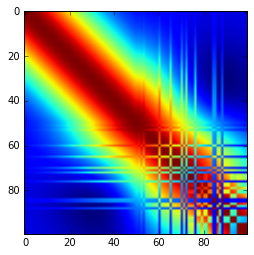

In [20]:
KbranchParam.kern.lengthscales = 2
KbranchParam.kern.variance = 1
with KbranchParam.tf_mode():
    KbranchParam.make_tf_array(parameterVector)
    KbranchParam_s = KbranchParam.K(Xs,Ys)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())  # Not sure this is needed
    KbranchParam_values = sess.run(KbranchParam_s, feed_dict={parameterVector:KbranchParam.get_free_state(), \
                                                              KbranchParam.Bv:Bvalues,\
                                                              Xs:Xtrue, Ys:Xtrue.copy() })
plt.imshow(KbranchParam_values)
# also do sample of paths?

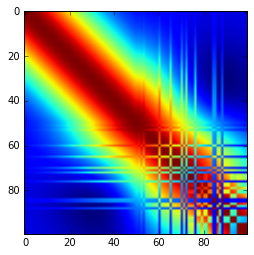

In [21]:
Kbranch = bk.BranchKernel( kernInsideBranch, fmb)
Kbranch.kern.lengthscales = 2
Kbranch.kern.variance = 1
with Kbranch.tf_mode():
    Kbranch.make_tf_array(parameterVector)
    Kbranch_s = Kbranch.K(Xs,Ys)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())  # Not sure this is needed
    Kbranch_values = sess.run(Kbranch_s, feed_dict={parameterVector:Kbranch.get_free_state(), Xs:Xtrue, Ys:Xtrue.copy() })
plt.imshow(Kbranch_values)
# also do sample of paths?

In [24]:
print np.allclose(Kbranch_values,KbranchParam_values)
assert np.allclose(Kbranch_values,KbranchParam_values)
assert np.allclose(Kbranch_values,KbranchParamGPflow_values)

True


In [9]:
m = fm.shape[0] # number of functions
for fi in range(m):
    for fj in range(m):
        if (fi != fj):
            # much easier to remove nans before tensorflow 
            bnan = fm[fi,fj,~np.isnan(fm[fi,fj,:])]
            bint = bnan.astype(int) # convert to int
            print str(fi) + ' ' + str(fj) + ' = ' + str(bint) 
            print bint.dtype            

0 1 = [1 2]
int64
0 2 = [1]
int64
0 3 = [1 2]
int64
0 4 = [1 2]
int64
1 0 = [1 2]
int64
1 2 = [1]
int64
1 3 = [1 2]
int64
1 4 = [1 2]
int64
2 0 = [1]
int64
2 1 = [1]
int64
2 3 = [1]
int64
2 4 = [1]
int64
3 0 = [1 2]
int64
3 1 = [1 2]
int64
3 2 = [1]
int64
3 4 = [1 2]
int64
4 0 = [1 2]
int64
4 1 = [1 2]
int64
4 2 = [1]
int64
4 3 = [1 2]
int64


In [10]:
a = np.zeros((m,m,2),dtype=int)
a.dtype

dtype('int64')

In [11]:
# Control flow
x = tf.constant(2)
y = tf.constant(1)
def f1(): return tf.mul(x, 17)
def f2(): return tf.add(y, 23)
r = tf.cond(tf.less(x, y), f1, f2)
# r is set to f1().
# Operations in f2 (e.g., tf.add) are not executed
with tf.Session() as sess:
    k=sess.run(r)  # Not sure this is needed
print k

24


In [12]:
# Check for branching list indexing
Bvalues = np.asarray(tree.GetBranchValues())
#Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()),1)

print Bvalues
print Bvalues.shape
print Bvalues.dtype
print Bvalues.size
Btf =  tf.placeholder("float64",shape=(Bvalues.size)) # pass in values of B
    

fi,fj = 4,3 # 1, 2
#fi,fj = 4,2 # 1

# much easier to remove nans before tensorflow 
bnan = fm[fi,fj,~np.isnan(fm[fi,fj,:])]
bint = bnan.astype(int) # convert to int
print str(fi) + ' ' + str(fj) + ' = ' + str(bint) 
print bint.dtype
print bint
#B = tf.shape( tf.squeeze(tf.pack([tf.slice(Btf,[i-1],np.asarray([1],int)) for i in bint])) )
B = ( (tf.pack([tf.slice(Btf,[i-1],np.asarray([1],int)) for i in bint])) )
#B = ( (tf.pack([tf.slice(Btf,tf.expand_dims(np.asarray([i-1],int),0),tf.expand_dims(np.asarray([1],int),1)) for i in bint])) )

with tf.Session() as sess:
    k=sess.run(B, feed_dict={Btf:Bvalues})
print 'k'
print k

[5 7]
(2,)
int64
2
4 3 = [1 2]
int64
[1 2]
k
[[ 5.]
 [ 7.]]


In [13]:
# Check for branching list indexing
Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()),1)

print Bvalues
print Bvalues.shape
print Bvalues.dtype
print Bvalues.size
Btf =  tf.placeholder("float64",shape=(Bvalues.size, None)) # pass in values of B
    

fi,fj = 4,3 # 1, 2
#fi,fj = 4,2 # 1

# much easier to remove nans before tensorflow 
bnan = fm[fi,fj,~np.isnan(fm[fi,fj,:])]
bint = bnan.astype(int) # convert to int
print str(fi) + ' ' + str(fj) + ' = ' + str(bint) 
print bint.dtype
print 'bint'
print bint
#B = tf.shape( tf.squeeze(tf.pack([tf.slice(Btf,[i-1],np.asarray([1],int)) for i in bint])) )
#B = tf.slice(Btf, [0,0], [1,1])
B = ( (tf.concat(0,[tf.slice(Btf,[i-1,0], [1,1]) for i in bint])) )
print B
#B = ( (tf.pack([tf.slice(Btf,tf.expand_dims(np.asarray([i-1],int),0),tf.expand_dims(np.asarray([1],int),1)) for i in bint])) )

with tf.Session() as sess:
    k=sess.run(B, feed_dict={Btf:Bvalues})
print 'k'
print k
print k.shape

[[5]
 [7]]
(2, 1)
int64
2
4 3 = [1 2]
int64
bint
[1 2]
Tensor("concat:0", shape=(2, 1), dtype=float64)
k
[[ 5.]
 [ 7.]]
(2, 1)


In [14]:
k = GPflow.kernels.RBF(D-1)
    
with k.tf_mode():
    k.make_tf_array(parameterVector)
    k_s = k.K(B)
    a = tf.ones_like(B, dtype=tf.float64)
    b = tf.diag(a)
    c = b  * 1e-6
    #kbb = k_s + c 
    kbb = k_s + tf.diag(tf.ones(tf.shape(B)[:1], dtype=tf.float64)) * 1e-6
    
with tf.Session() as sess:
    res=sess.run(kbb, feed_dict={parameterVector:k.get_free_state(), Btf:Bvalues})    
print res

[[ 1.000001    0.13533528]
 [ 0.13533528  1.000001  ]]


In [15]:
print res.shape

(2, 2)
